In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from IPython.display import display, HTML
pd.set_option('display.max_columns', 500)

male_df = pd.read_csv("../Data-Project2/MALE.csv")
female_df = pd.read_csv("../Data-Project2/FEMALE.csv")
mixed_df = pd.read_csv("../Data-Project2/MIXED.csv")

,Year,FSM,VR1 Band,VR Band of Student,Ethnic group of student,School denomination,Exam Score
Year,1.000000,0.310356,-0.115156,-0.012401,0.016566,-0.054839,0.030357
FSM,0.310356,1.000000,-0.663802,-0.057669,0.143429,-0.195003,-0.145205
VR1 Band,-0.115156,-0.663802,1.000000,0.055520,-0.114039,0.239845,0.189623
VR Band of Student,-0.012401,-0.057669,0.055520,1.000000,-0.040201,0.015157,0.122282
Ethnic group of student,0.016566,0.143429,-0.114039,-0.040201,1.000000,0.050347,0.035312
School denomination,-0.054839,-0.195003,0.239845,0.015157,0.050347,1.000000,0.110279
Exam Score,0.030357,-0.145205,0.189623,0.122282,0.035312,0.110279,1.000000


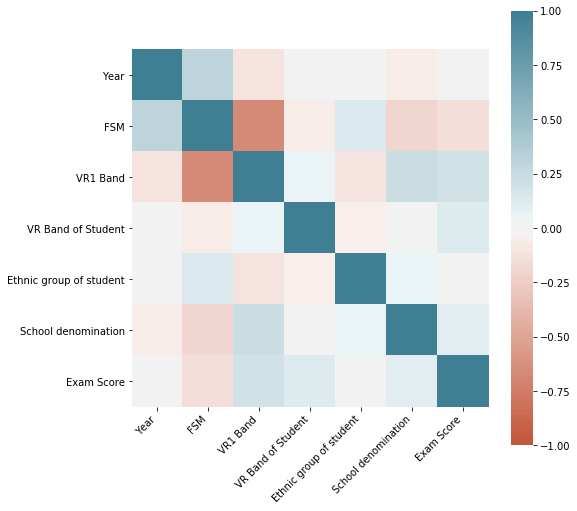

In [2]:
male_df.head()

## correlation matrix
corr = mixed_df.corr()
plt.figure(figsize = (8,8))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# data_copy.dtypes
# data_copy.head()
mixed_df.corr()

In [3]:
mixed_df['VR Band of Student'].value_counts()

### remove rows where "VR Band of Student" is 0, since the meaning of "0" is unknown
mixed_df.drop(mixed_df[mixed_df['VR Band of Student'] == 0].index, inplace = True) 
mixed_df['VR Band of Student'].value_counts()

print(mixed_df.shape)

(7289, 7)


In [4]:
### one hot encoding a column
def one_hot_encoding(df, column):
    # Get one hot encoding of column B
    one_hot = pd.get_dummies(df[column], prefix=column)
    # Drop column B as it is now encoded
    new_df = df.drop(column, axis = 1)
    # Join the encoded df
    return new_df.join(one_hot)  

In [5]:
## one hot encode categorical features
male_df = one_hot_encoding(male_df, 'Ethnic group of student')
male_df = one_hot_encoding(male_df, 'School denomination')

female_df = one_hot_encoding(female_df, 'Ethnic group of student')
female_df = one_hot_encoding(female_df, 'School denomination')

mixed_df = one_hot_encoding(mixed_df, 'Ethnic group of student')
mixed_df = one_hot_encoding(mixed_df, 'School denomination')

## one hot encode vr band of student
male_df = one_hot_encoding(male_df, 'VR Band of Student')
female_df = one_hot_encoding(female_df, 'VR Band of Student')
mixed_df = one_hot_encoding(mixed_df, 'VR Band of Student')

# drop FSM because it's an irrelevant feature
male_df = male_df.drop(columns=['FSM'])
female_df = female_df.drop(columns=['FSM'])
mixed_df = mixed_df.drop(columns=['FSM'])

male_df.head()

,Year,VR1 Band,Exam Score,Ethnic group of student_1,Ethnic group of student_2,Ethnic group of student_3,Ethnic group of student_4,Ethnic group of student_5,Ethnic group of student_6,Ethnic group of student_7,Ethnic group of student_8,Ethnic group of student_9,Ethnic group of student_10,Ethnic group of student_11,School denomination_1,School denomination_2,School denomination_3,VR Band of Student_1,VR Band of Student_2,VR Band of Student_3
0,1,21,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,21,12,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,21,16,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,21,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1,21,9,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [6]:
### split data into training, development and test partitions
def split_data(df):
    data = {}
    
    X = df.drop(columns=['Exam Score'])
    y = df['Exam Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
    
    data['X_train'] = X_train
    data['X_dev'] = X_dev
    data['X_test'] = X_test
    data['y_train'] = y_train
    data['y_dev'] = y_dev
    data['y_test'] = y_test
    
    return data

In [7]:
data_dict = {}

data_dict['male'] = split_data(male_df)
data_dict['female'] = split_data(female_df)
data_dict['mixed'] = split_data(mixed_df)


print(data_dict['male']['X_train'].shape)
print(data_dict['female']['X_train'].shape)
print(data_dict['mixed']['X_train'].shape)

print(data_dict['male']['X_dev'].shape)


# print(data_dict['female']['X_dev'].shape)
# print(data_dict['female']['X_test'].shape)

# print(data_dict['female']['y_train'].shape)
# print(data_dict['female']['y_dev'].shape)
# print(data_dict['female']['y_test'].shape)
data_dict['male']['X_train'].head()

(2926, 19)
(3527, 19)
(5838, 19)
(362, 19)


,Year,VR1 Band,Ethnic group of student_1,Ethnic group of student_2,Ethnic group of student_3,Ethnic group of student_4,Ethnic group of student_5,Ethnic group of student_6,Ethnic group of student_7,Ethnic group of student_8,Ethnic group of student_9,Ethnic group of student_10,Ethnic group of student_11,School denomination_1,School denomination_2,School denomination_3,VR Band of Student_1,VR Band of Student_2,VR Band of Student_3
2058,1,38,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1123,2,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
766,2,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1510,2,27,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2380,3,11,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [8]:
def get_100_instances(target, partition, data_dict):
    return data_dict[target][partition].iloc[:100]

# add columns for a domain which is member of {general, male, female, mixed}
def add_columns_for_one_domain(is_zero_vector, df, domain, column_names):  
    
    new_df = df.copy()
    n_rows = new_df.shape[0]
    zero_list = [0] * n_rows
    
    general_df = new_df[column_names]
    
    if is_zero_vector == True:
        for column in general_df:
            new_df = new_df.assign(new_column = pd.Series(zero_list).values)
            new_df.rename(columns={'new_column': domain + ' ' + column}, inplace=True)
    
    else:
        for column in general_df:
            new_df = new_df.assign(new_column = new_df[column].values)
            new_df.rename(columns={'new_column': domain + ' ' + column}, inplace=True)
            
    return new_df

In [9]:
def feda_augment_feature_space(target, src_domains, data_dict):
    first_src_domain = src_domains[0]
    second_src_domain = src_domains[1]
    
    X_train_first_src_domain = data_dict[first_src_domain]['X_train']
    X_train_second_src_domain = data_dict[second_src_domain]['X_train']
    X_train_target = get_100_instances(target, 'X_train', data_dict)
    
    column_names = list(X_train_first_src_domain.columns.values)
#     print(column_names)
    
    ## expand feature space for the first source domain         
    X_train_first_src_domain = add_columns_for_one_domain(False, X_train_first_src_domain, first_src_domain, column_names) 
    X_train_first_src_domain = add_columns_for_one_domain(True, X_train_first_src_domain, second_src_domain, column_names)
    X_train_first_src_domain = add_columns_for_one_domain(True, X_train_first_src_domain, target, column_names) 
    ## second source domain
    X_train_second_src_domain = add_columns_for_one_domain(True, X_train_second_src_domain, first_src_domain, column_names) 
    X_train_second_src_domain = add_columns_for_one_domain(False, X_train_second_src_domain, second_src_domain, column_names) 
    X_train_second_src_domain = add_columns_for_one_domain(True, X_train_second_src_domain, target, column_names) 
    ## target
    X_train_target = add_columns_for_one_domain(True, X_train_target, first_src_domain, column_names) 
    X_train_target = add_columns_for_one_domain(True, X_train_target, second_src_domain, column_names) 
    X_train_target = add_columns_for_one_domain(False, X_train_target, target, column_names) 
    ## concatenate domain data
    X_train = pd.concat([X_train_target, X_train_first_src_domain, 
                             X_train_second_src_domain], ignore_index=True, sort=False)
    y_train = pd.concat([get_100_instances(target, 'y_train', data_dict), data_dict[src_domains[0]]['y_train'], 
                         data_dict[src_domains[1]]['y_train']], ignore_index=True, sort=False)
    
    ## augment feature space for development and test 
    X_dev = get_100_instances(target, 'X_dev', data_dict)
    y_dev = get_100_instances(target, 'y_dev', data_dict)
    
    X_test = data_dict[target]['X_test']
    y_test = data_dict[target]['y_test']
    
    X_dev = add_columns_for_one_domain(True, X_dev, first_src_domain, column_names) 
    X_dev = add_columns_for_one_domain(True, X_dev, second_src_domain, column_names) 
    X_dev = add_columns_for_one_domain(False, X_dev, target, column_names) 
    
    X_test = add_columns_for_one_domain(True, X_test, first_src_domain, column_names) 
    X_test = add_columns_for_one_domain(True, X_test, second_src_domain, column_names) 
    X_test = add_columns_for_one_domain(False, X_test, target, column_names) 

    return X_train, y_train, X_dev, y_dev, X_test, y_test

In [11]:
### get the data partitions for a given target for the ALL baseline
def get_data_partitions_for_a_target(target, data_dict, baseline):
    X_train = None
    y_train = None
    
    domains = {"male", "female", "mixed"}
    src_domains = list(domains.difference({target}))
    
    assert len(src_domains) == 2
    
    if baseline == 'FEDA':
        X_train, y_train, X_dev, y_dev, X_test, y_test = feda_augment_feature_space(target, src_domains, data_dict)
        assert X_train.shape[1] == 76 and X_dev.shape[1] == 76 and X_test.shape[1] == 76
        
#         display(X_train)
#         display(X_dev)
#         display(X_test)
        return X_train, y_train, X_dev, y_dev, X_test, y_test
        
    if baseline == 'ALL' or baseline == 'WEIGHTED':
        X_train = pd.concat([get_100_instances(target, 'X_train', data_dict), data_dict[src_domains[0]]['X_train'], 
                             data_dict[src_domains[1]]['X_train']], ignore_index=True, sort=False)
        y_train = pd.concat([get_100_instances(target, 'y_train', data_dict), data_dict[src_domains[0]]['y_train'], 
                         data_dict[src_domains[1]]['y_train']], ignore_index=True, sort=False)
    
    if baseline == 'SRCONLY':
        X_train = pd.concat([data_dict[src_domains[0]]['X_train'], 
                             data_dict[src_domains[1]]['X_train']], ignore_index=True, sort=False)
        y_train = pd.concat([data_dict[src_domains[0]]['y_train'], 
                         data_dict[src_domains[1]]['y_train']], ignore_index=True, sort=False)
    
    if baseline == 'TGTONLY':
        X_train = get_100_instances(target, 'X_train', data_dict)
        y_train = get_100_instances(target, 'y_train', data_dict)
        
    X_dev = get_100_instances(target, 'X_dev', data_dict)
    y_dev = get_100_instances(target, 'y_dev', data_dict)
    
    X_test = data_dict[target]['X_test']
    y_test = data_dict[target]['y_test']
        
    return X_train, y_train, X_dev, y_dev, X_test, y_test

In [12]:
### tune parameters
def tune_paras_lin_reg(X_train, y_train, X_dev, y_dev, para_grid):
    best_model = None
    best_mse = float('inf')
    best_paras = {
        "alpha": None,
    }
    
    
    for alpha in para_grid["alpha"]:
        model = Ridge(alpha = alpha)
        model.fit(X_train, y_train)

        pred = model.predict(X_dev)

        mse = mean_squared_error(y_dev, pred)
#         print(mse)

        if mse < best_mse:
            best_mse = mse
            best_paras["alpha"] = alpha
    
            best_model = model
                
    return best_model, best_mse, best_paras

def tune_paras_weighted_lin_reg(X_train, y_train, X_dev, y_dev, para_grid):
    best_model = None
    best_mse = float('inf')
    best_paras = {
        "alpha": None,
        "weight": None
    }
    
    n_src_samples = X_train.shape[0] - 100
    
    for alpha in para_grid["alpha"]:
        for weight in para_grid["weight"]:
            
            sample_weight = [1] * 100 + [weight] * n_src_samples
            
            model = Ridge(alpha = alpha)
            model.fit(X_train, y_train, sample_weight = sample_weight)

            pred = model.predict(X_dev)

            mse = mean_squared_error(y_dev, pred)
#             print(mse)

            if mse < best_mse:
                best_mse = mse
                best_paras["alpha"] = alpha
                best_paras["weight"] = weight

                best_model = model
                
    return best_model, best_mse, best_paras

def tune_para_performance_summary(best_mse, best_paras, model):
    print(model + ":")
    print("best mse: ", best_mse)
    print("best parameters: ", best_paras, "\n")

In [13]:
### tune parameters for decision tree regressor
def tune_paras_decision_tree(X_train, y_train, X_dev, y_dev, para_grid):
    best_model = None
    best_mse = float('inf')
    best_paras = {
        "max_depth": None,
        "min_samples_split": None,
        "min_samples_leaf": None
    }
        
    for max_depth in para_grid["max_depth"]:
        for min_samples_split in para_grid["min_samples_split"]:
            for min_samples_leaf in para_grid["min_samples_leaf"]:
            
                model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split, 
                                              min_samples_leaf = min_samples_leaf)
                model.fit(X_train, y_train)

                pred = model.predict(X_dev)

                mse = mean_squared_error(y_dev, pred)

                if mse < best_mse:
                    best_mse = mse
                    best_paras["max_depth"] = max_depth
                    best_paras["min_samples_split"] = min_samples_split
                    best_paras["min_samples_leaf"] = min_samples_leaf

                    best_model = model
                
    return best_model, best_mse, best_paras

def tune_paras_weighted_decision_tree(X_train, y_train, X_dev, y_dev, para_grid):
    best_model = None
    best_mse = float('inf')
    best_paras = {
        "max_depth": None,
        "min_samples_split": None,
        "min_samples_leaf": None,
        "weight": None
    }
    
    n_src_samples = X_train.shape[0] - 100
        
    for max_depth in para_grid["max_depth"]:
        for min_samples_split in para_grid["min_samples_split"]:
            for min_samples_leaf in para_grid["min_samples_leaf"]:
                for weight in para_grid['weight']:
                    sample_weight = [1] * 100 + [weight] * n_src_samples
            
                    model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split, 
                                                  min_samples_leaf = min_samples_leaf)
                    model.fit(X_train, y_train, sample_weight = sample_weight)

                    pred = model.predict(X_dev)

                    mse = mean_squared_error(y_dev, pred)

                    if mse < best_mse:
                        best_mse = mse
                        best_paras["max_depth"] = max_depth
                        best_paras["min_samples_split"] = min_samples_split
                        best_paras["min_samples_leaf"] = min_samples_leaf
                        best_paras["weight"] = weight

                        best_model = model
                
    return best_model, best_mse, best_paras

In [14]:
### evaluate performance for a given target
def evaluate_performance_on_test(model, X_test, y_test, model_type):
    pred = model.predict(X_test)
    
    print(model_type + ": ")
    print('Mean squared error of the final model on test data: %.2f'
      % mean_squared_error(y_test, pred))
    return mean_squared_error(y_test, pred)

def pipeline_given_target(target, data_dict, para_grid, baseline):
    scaler = MinMaxScaler()
    
    X_train, y_train, X_dev, y_dev, X_test, y_test = get_data_partitions_for_a_target(target, data_dict, baseline)
    
    ### standardize data
    X_train = scaler.fit_transform(X_train)
    X_dev = scaler.transform(X_dev)
    X_test = scaler.transform(X_test)
    
    if baseline == 'WEIGHTED':
        best_model_LR, best_mse_LR, best_paras_LR = tune_paras_weighted_lin_reg(X_train, y_train, X_dev, y_dev, para_grid)
        best_model_DT, best_mse_DT, best_paras_DT = tune_paras_weighted_decision_tree(X_train, y_train, X_dev, y_dev, para_grid)
        
    else:
        best_model_LR, best_mse_LR, best_paras_LR = tune_paras_lin_reg(X_train, y_train, X_dev, y_dev, para_grid)
        best_model_DT, best_mse_DT, best_paras_DT = tune_paras_decision_tree(X_train, y_train, X_dev, y_dev, para_grid)
        
    tune_para_performance_summary(best_mse_LR, best_paras_LR, 'Linear Regression')
    tune_para_performance_summary(best_mse_DT, best_paras_DT, 'Decision Tree')

    ### evaluate performance on test data
    mse_test_LR = evaluate_performance_on_test(best_model_LR, X_test, y_test, 'Linear Regression')
    mse_test_DT = evaluate_performance_on_test(best_model_DT, X_test, y_test, 'Decision Tree')
        
    return best_model_LR, mse_test_LR, best_model_DT, mse_test_DT

def get_train_data_for_linint(X_dev, srconly_model, tgtonly_model):
    pred_srconly = srconly_model.predict(X_dev)
    pred_tgtonly = tgtonly_model.predict(X_dev)
    y1_minus_y2 = list(np.array(pred_srconly) - np.array(pred_tgtonly))
    
    d = {
        'y1': pred_srconly, 
        'y2': pred_tgtonly,
        'y1 - y2': y1_minus_y2
    }
    
    return pd.DataFrame(data=d)

def linint_pipeline_given_target(target, data_dict, srconly_model, tgtonly_model):
    scaler = MinMaxScaler()
    
    X_train, y_train, X_dev, y_dev, X_test, y_test = get_data_partitions_for_a_target(target, data_dict, 'ALL')
    ### standardize data
    X_train = scaler.fit_transform(X_train)
    X_dev = scaler.transform(X_dev)
    X_test = scaler.transform(X_test)
    
    X_train = get_train_data_for_linint(X_dev, srconly_model, tgtonly_model)
        
    model = LinearRegression()
    model.fit(X_train, y_dev)
    
    coefs = model.coef_
    intercept = model.intercept_
    
#     print(model.coef_)
#     print(model.intercept_)
    
    X_train = get_train_data_for_linint(X_test, srconly_model, tgtonly_model)
        
    y1 = X_train['y1'].tolist() 
    y2 = X_train['y2'].tolist() 
    y1_minus_y2 = X_train['y1 - y2'].tolist()
    
    pred = []
    
    for i in range(0, len(y1)):
        result = coefs[0] * y1[i] + coefs[1] * y2[i] + coefs[2] * y1_minus_y2[i] + intercept
        pred.append(result)
    
    print('Mean squared error of the final model: %.2f'
          % mean_squared_error(y_test, pred))  
    best_mse = mean_squared_error(y_test, pred)
    
    return best_mse

In [15]:
MSEs_LR = {}
MSEs_DT = {}

In [16]:
###
#  SRCONLY
###
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor

mse_LR = {}
mse_DT = {}

### tune parameters
para_grid_male = {
    "alpha": [140, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 160],
    "max_depth": [10, 11, 12, 13, 14, 15, 16, 17],
    "min_samples_split": [17, 18, 19, 20, 21, 22, 23],
    "min_samples_leaf": [19, 20, 21, 22, 23, 24, 25, 26]
}

para_grid_female = {
    "alpha": [1e-25, 1e-24, 1e-23, 1e-22, 1e-21, 1e-20, 1e-19, 1e-18],
    "max_depth": [10, 11, 12, 13, 14, 15],
    "min_samples_split": [162, 163, 164, 165, 166, 167, 168],
    "min_samples_leaf": [19, 20, 21, 22, 23, 24]
}

para_grid_mixed = {
    "alpha": [1e-100, 1e-60, 1e-50, 1e-40, 1e-25, 1e-24, 1e-23, 1e-22, 1e-20],
    "max_depth": [9, 10, 11, 12, 13],
    "min_samples_split": [162, 163, 164, 165, 166, 167, 168],
    "min_samples_leaf": [19, 20, 21, 22, 23, 24]
}

print("# male is target #\n")
srconly_model_male_LR, mse_LR['male'], srconly_model_male_DT, mse_DT['male'] = pipeline_given_target('male', 
                                                                                                     data_dict, 
                                                                                                     para_grid_male, 
                                                                                                     'SRCONLY')

print("\n# female is target #\n")
srconly_model_female_LR, mse_LR['female'], srconly_model_female_DT, mse_DT['female'] = pipeline_given_target('female', 
                                                                                                             data_dict, 
                                                                                                             para_grid_female, 
                                                                                                             'SRCONLY')

print("\n# mixed is target #\n")
srconly_model_mixed_LR, mse_LR['mixed'], srconly_model_mixed_DT, mse_DT['mixed'] = pipeline_given_target('mixed', 
                                                                                                         data_dict, 
                                                                                                         para_grid_mixed, 
                                                                                                         'SRCONLY')

MSEs_LR['srconly'] = mse_LR
MSEs_DT['srconly'] = mse_DT

# male is target #

Linear Regression:
best mse:  139.50296934581695
best parameters:  {'alpha': 153} 

Decision Tree:
best mse:  135.18528484778213
best parameters:  {'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 22} 

Linear Regression: 
Mean squared error of the final model on test data: 125.71
Decision Tree: 
Mean squared error of the final model on test data: 127.63

# female is target #

Linear Regression:
best mse:  109.12920180891349
best parameters:  {'alpha': 1e-24} 

Decision Tree:
best mse:  114.62215562408866
best parameters:  {'max_depth': 13, 'min_samples_split': 165, 'min_samples_leaf': 22} 

Linear Regression: 
Mean squared error of the final model on test data: 137.98
Decision Tree: 
Mean squared error of the final model on test data: 142.58

# mixed is target #

Linear Regression:
best mse:  101.121875
best parameters:  {'alpha': 1e-100} 

Decision Tree:
best mse:  119.27147580333921
best parameters:  {'max_depth': 11, 'min_samples_split': 162, 'min_s

In [17]:
###
#  TGTONLY
###

mse_LR = {}
mse_DT = {}

### tune parameters
para_grid_male = {
    "alpha": [3.5, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.8, 5, 6, 7, 8, 9, 10],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 8, 10]
}

para_grid_female = {
    "alpha": [1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-8, 1e-7, 1e-6],
    "max_depth": [1, 2, 3, 4, 5, 6],
    "min_samples_split": [18, 19, 20, 21, 22, 23],
    "min_samples_leaf": [6, 7, 8, 9, 10, 11, 12, 13]
}

para_grid_mixed = {
    "alpha": [1, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [27, 28, 29, 30, 31, 32, 33, 34],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

print("# male is target #\n")
tgtonly_model_male_LR, mse_LR['male'], tgtonly_model_male_DT, mse_DT['male'] = pipeline_given_target('male', 
                                                                                                     data_dict, 
                                                                                                     para_grid_male, 
                                                                                                     'TGTONLY')

print("\n# female is target #\n")
tgtonly_model_female_LR, mse_LR['female'], tgtonly_model_female_DT, mse_DT['female'] = pipeline_given_target('female', 
                                                                                                             data_dict, 
                                                                                                             para_grid_female, 
                                                                                                             'TGTONLY')

print("\n# mixed is target #\n")
tgtonly_model_mixed_LR, mse_LR['mixed'], tgtonly_model_mixed_DT, mse_DT['mixed'] = pipeline_given_target('mixed', 
                                                                                                         data_dict, 
                                                                                                         para_grid_mixed, 
                                                                                                         'TGTONLY')

MSEs_LR['tgtonly'] = mse_LR
MSEs_DT['tgtonly'] = mse_DT

# male is target #

Linear Regression:
best mse:  156.78986857630704
best parameters:  {'alpha': 4.3} 

Decision Tree:
best mse:  145.47125296694813
best parameters:  {'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 2} 

Linear Regression: 
Mean squared error of the final model on test data: 126.84
Decision Tree: 
Mean squared error of the final model on test data: 141.01

# female is target #

Linear Regression:
best mse:  107.98779459125828
best parameters:  {'alpha': 1e-14} 

Decision Tree:
best mse:  102.86500247503446
best parameters:  {'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 9} 

Linear Regression: 
Mean squared error of the final model on test data: 129.73
Decision Tree: 
Mean squared error of the final model on test data: 140.41

# mixed is target #



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.33205e-17): result may not be accurate.
  overwrite_a=True).T


Linear Regression:
best mse:  114.90587061919479
best parameters:  {'alpha': 17} 

Decision Tree:
best mse:  113.39635173757296
best parameters:  {'max_depth': 2, 'min_samples_split': 27, 'min_samples_leaf': 1} 

Linear Regression: 
Mean squared error of the final model on test data: 110.31
Decision Tree: 
Mean squared error of the final model on test data: 113.68


In [18]:
###
#  ALL
###
mse_LR = {}
mse_DT = {}

### tune parameters
para_grid_male = {
    "alpha": [140, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 160],
    "max_depth": [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "min_samples_split": [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
    "min_samples_leaf": [31, 32, 33, 34, 35, 36, 37]
}

para_grid_female = {
    "alpha": [1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-10, 1e-8, 1e-7, 1e-6],
    "max_depth": [9, 10, 11, 12, 14, 16, 18, 20],
    "min_samples_split": [189, 190, 191, 192, 193, 194, 195],
    "min_samples_leaf": [34, 35, 36, 37, 38, 39, 40, 41]
}

para_grid_mixed = {
    "alpha": [1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-8, 1e-7, 1e-6],
    "max_depth": [6, 7, 8, 9, 10, 11, 12, 13, 14],
    "min_samples_split": [79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
    "min_samples_leaf": [31, 32, 33, 34, 35, 36, 37, 38]
}

print("# male is target #\n")
all_model_male_LR, mse_LR['male'], all_model_male_DT, mse_DT['male'] = pipeline_given_target('male', 
                                                                                             data_dict,
                                                                                             para_grid_male, 
                                                                                             'ALL')

print("\n# female is target #\n")
all_model_female_LR, mse_LR['female'], all_model_female_DT, mse_DT['female'] = pipeline_given_target('female', 
                                                                                                     data_dict, 
                                                                                                     para_grid_female, 
                                                                                                     'ALL')

print("\n# mixed is target #\n")
all_model_mixed_LR, mse_LR['mixed'], all_model_mixed_DT, mse_DT['mixed'] = pipeline_given_target('mixed', 
                                                                                                 data_dict, 
                                                                                                 para_grid_mixed, 
                                                                                                 'ALL')

MSEs_LR['all'] = mse_LR
MSEs_DT['all'] = mse_DT

# male is target #

Linear Regression:
best mse:  139.48472583954887
best parameters:  {'alpha': 152} 

Decision Tree:
best mse:  131.3202181536756
best parameters:  {'max_depth': 9, 'min_samples_split': 70, 'min_samples_leaf': 34} 

Linear Regression: 
Mean squared error of the final model on test data: 125.57
Decision Tree: 
Mean squared error of the final model on test data: 125.71

# female is target #

Linear Regression:
best mse:  108.82252311526885
best parameters:  {'alpha': 1e-17} 

Decision Tree:
best mse:  116.0047453139656
best parameters:  {'max_depth': 11, 'min_samples_split': 191, 'min_samples_leaf': 37} 

Linear Regression: 
Mean squared error of the final model on test data: 137.59
Decision Tree: 
Mean squared error of the final model on test data: 140.12

# mixed is target #

Linear Regression:
best mse:  102.33942413052684
best parameters:  {'alpha': 1e-12} 

Decision Tree:
best mse:  114.26870433909534
best parameters:  {'max_depth': 11, 'min_samples_split': 81, 'mi

In [19]:
###
#  WEIGHTED
###
mse_LR = {}
mse_DT = {}

### tune parameters
para_grid_male = {
    "alpha": [37, 38, 39, 40, 41, 42, 43, 44, 45],
    "max_depth": [8, 9, 10, 11, 12, 13, 14],
    "min_samples_split": [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
    "min_samples_leaf": [31, 32, 33, 34, 35, 36, 37, 38],
    "weight": [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26]
}
para_grid_female = {
    "alpha": [1e-50, 1e-40, 1e-18, 1e-17, 1e-16, 1e-15],
    "max_depth": [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14],
    "min_samples_split": [9, 10, 11, 12, 13, 14, 15, 16, 17],
    "min_samples_leaf": [5, 8, 9, 10, 11, 12, 13, 14],
    "weight": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
}
para_grid_mixed = {
    "alpha": [1e-18, 1e-17, 1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-10, 1e-8, 1e-7, 1e-6],
    "max_depth": [6, 7, 8, 9, 10, 11, 12, 13, 14],
    "min_samples_split": [70, 71, 72, 73, 74, 75, 76],
    "min_samples_leaf": [63, 64, 65, 66, 67, 68, 69, 70, 71],
    "weight": [0.1, 0.14, 0.15, 0.16, 0.17, 0.2, 0.25, 0.3, 0.4, 0.5]
}

print("# male is target #\n")
_, mse_LR['male'], _, mse_DT['male'] = pipeline_given_target('male', data_dict, para_grid_male, 'WEIGHTED')

print("\n# female is target #\n")
_, mse_LR['female'], _, mse_DT['female'] = pipeline_given_target('female', data_dict, para_grid_female, 'WEIGHTED')

print("\n# mixed is target #\n")
_, mse_LR['mixed'], _, mse_DT['mixed'] = pipeline_given_target('mixed', data_dict, para_grid_mixed, 'WEIGHTED')

MSEs_LR['weighted'] = mse_LR
MSEs_DT['weighted'] = mse_DT

# male is target #

Linear Regression:
best mse:  139.46455130825711
best parameters:  {'alpha': 39, 'weight': 0.26} 

Decision Tree:
best mse:  132.8651767214339
best parameters:  {'max_depth': 11, 'min_samples_split': 79, 'min_samples_leaf': 35, 'weight': 0.23} 

Linear Regression: 
Mean squared error of the final model on test data: 125.20
Decision Tree: 
Mean squared error of the final model on test data: 122.56

# female is target #

Linear Regression:
best mse:  103.3144620559952
best parameters:  {'alpha': 1e-15, 'weight': 0.01} 

Decision Tree:
best mse:  107.53108471480579
best parameters:  {'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 12, 'weight': 0.04} 

Linear Regression: 
Mean squared error of the final model on test data: 128.00
Decision Tree: 
Mean squared error of the final model on test data: 151.80

# mixed is target #



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.71156e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35182e-17): result may not be accurate.
  overwrite_a=True).T


Linear Regression:
best mse:  102.47456122579362
best parameters:  {'alpha': 1e-18, 'weight': 0.5} 

Decision Tree:
best mse:  100.19096059463614
best parameters:  {'max_depth': 8, 'min_samples_split': 75, 'min_samples_leaf': 69, 'weight': 0.15} 

Linear Regression: 
Mean squared error of the final model on test data: 101.30
Decision Tree: 
Mean squared error of the final model on test data: 104.26


In [20]:
def pred_pipeline_given_target(target, data_dict, para_grid, srconly_model, model_type):
    scaler = MinMaxScaler()
    
    X_train, y_train, X_dev, y_dev, X_test, y_test = get_data_partitions_for_a_target(target, data_dict, 'TGTONLY')

    pred = srconly_model.predict(X_train)
    X_train = X_train.assign(predictions = pd.Series(pred).values)
    
    pred = srconly_model.predict(X_dev)
    X_dev = X_dev.assign(predictions = pd.Series(pred).values)
    
    pred = srconly_model.predict(X_test)
    X_test = X_test.assign(predictions = pd.Series(pred).values)
    
    ### standardize data
    X_train = scaler.fit_transform(X_train)
    X_dev = scaler.transform(X_dev)
    X_test = scaler.transform(X_test)
    
    if model_type == 'Linear Regression':
        best_model, best_mse, best_paras = tune_paras_lin_reg(X_train, y_train, X_dev, y_dev, para_grid)
    elif model_type == 'Decision Tree':
        best_model, best_mse, best_paras = tune_paras_decision_tree(X_train, y_train, X_dev, y_dev, para_grid)
    
    tune_para_performance_summary(best_mse, best_paras, model_type)

    ### evaluate performance on test data
    mse_test = evaluate_performance_on_test(best_model, X_test, y_test, model_type)
    
    return mse_test

In [21]:
###
#  PRED
###
mse_LR = {}
mse_DT = {}

para_grid_male = {
    "alpha": [1, 2, 3, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 5],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_split": [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 8, 10]
}

para_grid_female = {
    "alpha": [1, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5],
    "max_depth": [1, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 3, 4, 6, 8, 10, ],
    "min_samples_leaf": [12, 14, 15, 16, 17, 18, 19, 20, 30, 40]
}

para_grid_mixed = {
    "alpha": [3.5, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "min_samples_split": [2, 3, 4, 5, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 8, 10]
}

print("# male is target #\n")
mse_LR['male'] = pred_pipeline_given_target('male', data_dict, para_grid_male, srconly_model_male_LR, 'Linear Regression')
mse_DT['male'] = pred_pipeline_given_target('male', data_dict, para_grid_male, srconly_model_male_DT, 'Decision Tree')

print("\n\n# female is target #\n")
mse_LR['female'] = pred_pipeline_given_target('female', data_dict, para_grid_female, 
                                              srconly_model_female_LR, 'Linear Regression')
mse_DT['female'] = pred_pipeline_given_target('female', data_dict, para_grid_female, srconly_model_female_DT, 'Decision Tree')


print("\n\n# mixed is target #\n")
mse_LR['mixed'] = pred_pipeline_given_target('mixed', data_dict, para_grid_mixed, 
                                              srconly_model_mixed_LR, 'Linear Regression')
mse_DT['mixed'] = pred_pipeline_given_target('mixed', data_dict, para_grid_mixed, srconly_model_mixed_DT, 'Decision Tree')

MSEs_LR['pred'] = mse_LR
MSEs_DT['pred'] = mse_DT

# male is target #

Linear Regression:
best mse:  156.7764521554666
best parameters:  {'alpha': 4.3} 

Linear Regression: 
Mean squared error of the final model on test data: 126.73
Decision Tree:
best mse:  143.21187035324152
best parameters:  {'max_depth': 6, 'min_samples_split': 21, 'min_samples_leaf': 2} 

Decision Tree: 
Mean squared error of the final model on test data: 139.61


# female is target #

Linear Regression:
best mse:  105.03000886739734
best parameters:  {'alpha': 3} 

Linear Regression: 
Mean squared error of the final model on test data: 126.82
Decision Tree:
best mse:  107.6090860969388
best parameters:  {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 17} 

Decision Tree: 
Mean squared error of the final model on test data: 136.55


# mixed is target #

Linear Regression:
best mse:  114.23369195415152
best parameters:  {'alpha': 17} 

Linear Regression: 
Mean squared error of the final model on test data: 109.38
Decision Tree:
best mse:  113.396351737

In [22]:
###
#  LININT
###
mse_LR = {}
mse_DT = {}

print("# male is target #\n")
mse_LR['male'] = linint_pipeline_given_target('male', data_dict, srconly_model_male_LR, tgtonly_model_male_LR)
mse_DT['male'] = linint_pipeline_given_target('male', data_dict, srconly_model_male_DT, tgtonly_model_male_DT)

print("\n\n# female is target #\n")
mse_LR['female'] = linint_pipeline_given_target('female', data_dict, srconly_model_female_LR, tgtonly_model_female_LR)
mse_DT['female'] = linint_pipeline_given_target('female', data_dict, srconly_model_female_DT, tgtonly_model_female_DT)

print("\n\n# mixed is target #\n")
mse_LR['mixed'] = linint_pipeline_given_target('mixed', data_dict, srconly_model_mixed_LR, tgtonly_model_mixed_LR)
mse_DT['mixed'] = linint_pipeline_given_target('mixed', data_dict, srconly_model_mixed_DT, tgtonly_model_mixed_DT)

MSEs_LR['linint'] = mse_LR
MSEs_DT['linint'] = mse_DT

# male is target #

Mean squared error of the final model: 125.57
Mean squared error of the final model: 125.27


# female is target #

Mean squared error of the final model: 123.73
Mean squared error of the final model: 127.58


# mixed is target #

Mean squared error of the final model: 108.17
Mean squared error of the final model: 105.15


In [26]:
###
# FEDA
###
mse_LR = {}
mse_DT = {}

para_grid_male = {
    "alpha": [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 130],
    "max_depth": [22, 24, 25, 26, 27, 28, 29, 30, 31],
    "min_samples_split": [10, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7]
}

para_grid_female = {
    "alpha": [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "max_depth": [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
    "min_samples_split": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}
para_grid_mixed = {
    "alpha": [100, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 130],
    "max_depth": [35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
    "min_samples_split": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

print("# male is target #\n")
feda_model_male_LR, mse_LR['male'], feda_model_male_DT, mse_DT['male'] = pipeline_given_target('male', 
                                                                                               data_dict, 
                                                                                               para_grid_male, 
                                                                                               'FEDA')

print("\n# female is target #\n")
feda_model_female_LR, mse_LR['female'], feda_model_female_DT, mse_DT['female'] = pipeline_given_target('female', 
                                                                                                       data_dict, 
                                                                                                       para_grid_female, 
                                                                                                       'FEDA')

print("\n# mixed is target #\n")
feda_model_mixed_LR, mse_LR['mixed'], feda_model_mixed_DT, mse_DT['mixed'] = pipeline_given_target('mixed', 
                                                                                                   data_dict,
                                                                                                   para_grid_mixed, 
                                                                                                   'FEDA')

MSEs_LR['feda'] = mse_LR
MSEs_DT['feda'] = mse_DT

# male is target #

Linear Regression:
best mse:  147.87158113098255
best parameters:  {'alpha': 113} 

Decision Tree:
best mse:  122.02631337586082
best parameters:  {'max_depth': 22, 'min_samples_split': 15, 'min_samples_leaf': 2} 

Linear Regression: 
Mean squared error of the final model on test data: 123.67
Decision Tree: 
Mean squared error of the final model on test data: 145.97

# female is target #

Linear Regression:
best mse:  100.90381965932158
best parameters:  {'alpha': 10} 

Decision Tree:
best mse:  109.18640225712045
best parameters:  {'max_depth': 47, 'min_samples_split': 18, 'min_samples_leaf': 9} 

Linear Regression: 
Mean squared error of the final model on test data: 124.34
Decision Tree: 
Mean squared error of the final model on test data: 139.80

# mixed is target #

Linear Regression:
best mse:  102.54567699445481
best parameters:  {'alpha': 111} 

Decision Tree:
best mse:  112.37624462310117
best parameters:  {'max_depth': 43, 'min_samples_split': 15, 'min_sam

In [24]:
###
#  MSE summary
###

## linear regression
for key, value in MSEs_LR.items(): 
    print("\n" + key + ': \n')
    for target, val in value.items():
        print(target + ": " + str(val))


srconly: 

male: 125.71414171282679
female: 137.97842015757604
mixed: 102.10633144718793

tgtonly: 

male: 126.83975877139089
female: 129.73387925038682
mixed: 110.31032170992508

all: 

male: 125.57144214216548
female: 137.59197867612195
mixed: 101.37151046279537

weighted: 

male: 125.19969623740867
female: 127.999112433373
mixed: 101.29585518659934

pred: 

male: 126.73327624445406
female: 126.81515414051644
mixed: 109.37544784603315

linint: 

male: 125.5675684953006
female: 123.73018022800925
mixed: 108.1725479074162

feda: 

male: 123.67265198173102
female: 124.34169419426604
mixed: 103.47154600665553


In [25]:
## decision tree
for key, value in MSEs_DT.items(): 
    print("\n" + key + ': \n')
    for target, val in value.items():
        print(target + ": " + str(val))


srconly: 

male: 127.63408224636876
female: 142.5847805449272
mixed: 106.63687096927222

tgtonly: 

male: 141.01239558173333
female: 140.41091674958807
mixed: 113.68121855573948

all: 

male: 125.71023137081818
female: 140.1161744605558
mixed: 105.67298695956944

weighted: 

male: 122.56215780517402
female: 151.7954928795514
mixed: 104.26073977111952

pred: 

male: 139.611828543789
female: 136.54625402031562
mixed: 113.68121855573948

linint: 

male: 125.26710037272298
female: 127.58040492973697
mixed: 105.1458105876258

feda: 

male: 144.72612232440073
female: 142.5504329881887
mixed: 117.87718339284673


In [72]:
# ***************************************************************************************
# *    Title: Hiton diagram
# *    Author: David Warde-Farley
# *    Date: 25 May, 2020
# *    Code version: NN
# *    Availability: https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html
# *
# ***************************************************************************************

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


## column order: general ##
Year
[1.2868082835899777, -0.059458824592192455, 1.1967813129472953, -0.27945029929516535]


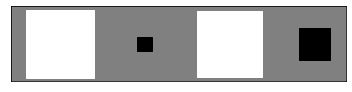

VR1 Band
[3.4736192440427613, 1.1426060841794785, 2.3825444136232092, -0.2071477056988738]


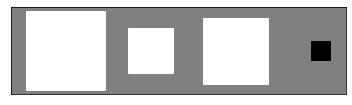

Ethnic group of student_1
[-2.3637689239615733, -1.1798082654834472, -0.6732191208956896, -0.5107415375824171]


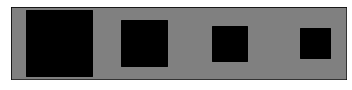

Ethnic group of student_2
[0.011356547736394685, -0.49093802597465397, 0.5829414117148276, -0.08064683800378127]


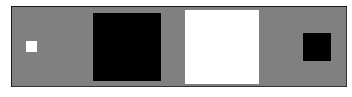

Ethnic group of student_3
[0.060532856862850815, -0.3244233128410488, 0.38495616970390323, 0.0]


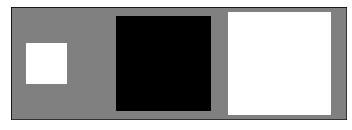

Ethnic group of student_4
[1.043591317905697, 0.3698842813676182, 0.4336294594570939, 0.24007757708098745]


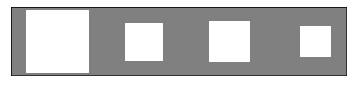

Ethnic group of student_5
[-2.857214840092825, -2.0307743289974645, -0.5820784704928077, -0.24436204060255778]


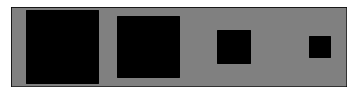

Ethnic group of student_6
[0.6771478325214739, 0.5015336608451821, 0.13643492729371928, 0.03917924438257379]


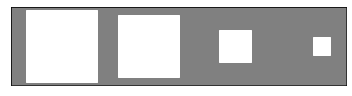

Ethnic group of student_7
[1.549692659360011, 0.8741141610363422, 0.7549294676156965, -0.07935096929202685]


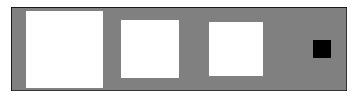

Ethnic group of student_8
[1.3151777592024554, 1.3221912430607092, -0.11122365785987949, 0.10421017400162624]


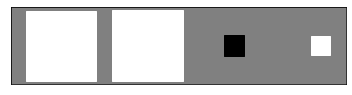

Ethnic group of student_9
[1.134356796595571, 1.102841006847857, 0.10117325960857436, -0.06965746986086876]


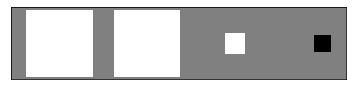

Ethnic group of student_10
[-0.5578702845657216, -0.297000464163295, -0.26086982040242845, 0.0]


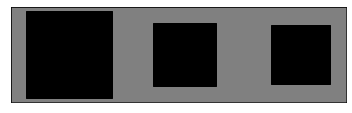

Ethnic group of student_11
[-0.013001721564345743, -0.66323860630787, 0.7280221544889277, -0.07778526974541597]


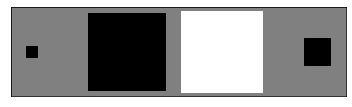

School denomination_1
[-0.5990047448075916, -0.28363187127750933, -0.40910217150199596, 0.09372929797179239]


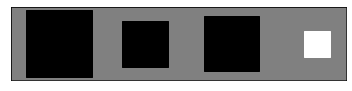

School denomination_2
[0.5139831570622467, 0.9129933521496391, 0.11263854425597965, -0.5116487393433703]


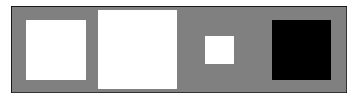

School denomination_3
[0.08502158774547543, -1.4449801314821726, 1.7911594074779718, -0.26115768825030355]


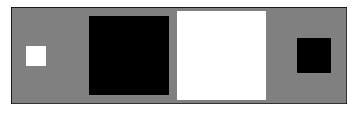

VR Band of Student_1
[-5.98442582942532, -2.265197285856008, -2.8920965188547973, -0.8271320247145092]


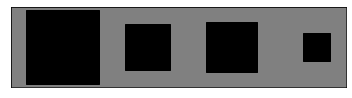

VR Band of Student_2
[6.7107301890140665, 1.938060093170545, 4.0510325418849895, 0.7216375539586161]


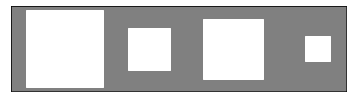

VR Band of Student_3
[-0.7263043595888974, -0.48848145792467623, 0.3357597572019005, -0.5735826588659968]


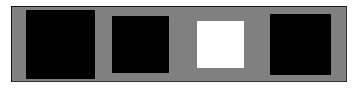

In [70]:
###
#  plot coefficients of linear regression model
###

## male is target

print("## column order: general ##")
coefs = feda_model_mixed_LR.coef_

column_names = list(male_df.columns.values)
column_names.remove('Exam Score')

increment = len(column_names)
# print(increment)
# print(len(coefs))

for column in column_names:
    index = column_names.index(column)
    print(column)
    ind_list = [index, index + increment, index + 2*increment, index + 3*increment]
    
    corresponding_coefs = [ coefs[i] for i in ind_list]
    print(corresponding_coefs)
    transformed_coefs = []
    for value in corresponding_coefs:
        transformed_coefs.append([value])
    
    hinton(transformed_coefs, max_weight=None, ax=None)
    plt.show()
#     print(corresponding_coefs)

In [63]:
a = [0.001, 2, 3, 4]

# hinton([[a[0]], [a[1]], [a[2]], [a[3]]], max_weight=None, ax=None)

transformed_a = [[a[i]] for i in a]
hinton([[a[0]], [a[1]], [a[2]], [a[3]]], max_weight=None, ax=None)



TypeError: list indices must be integers or slices, not float